In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import math
from scipy.stats import mode
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from numpy.random import randint

# KNN força Bruta

In [2]:
#Funcao auxiliar para calcular a distancia
def euclidean_distance(data1, data2):
    distance = np.sqrt(np.sum((data1 - data2)**2))
    return distance

In [3]:
def KNN_predict(x_train, y_train, x_test, k):
    label = []
    # calcula a distancia para cada item na linha de teste
    for item in x_test:
        dist = []
        for j in range(len(x_train)):
            distances = euclidean_distance(np.array(x_train[j,:]), item)
            dist.append(distances)
        dist = np.array(dist)
        dist = np.argsort(dist)[:k]
        labels = y_train[dist]
        lab = mode(labels)
        lab = lab.mode[0]
        label.append(lab)
    return label

# Pre processamento Pinguins 

In [4]:
penguins = pd.read_csv("../penguins.csv")
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [5]:
penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [6]:
# Descarta colunas que não serão usadas e descarta linhas com valores nulos

penguins_numeric_and_target = penguins.drop(columns=["studyName","Sample Number","Region","Island","Stage","Individual ID", 
                                   "Clutch Completion","Date Egg", "Body Mass (g)", "Sex", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)", 
                                   "Comments"])

penguins_numeric_and_target = penguins_numeric_and_target.dropna()
penguins_numeric_and_target = penguins_numeric_and_target.reset_index(drop=True)
penguins_numeric_and_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              342 non-null    object 
 1   Culmen Length (mm)   342 non-null    float64
 2   Culmen Depth (mm)    342 non-null    float64
 3   Flipper Length (mm)  342 non-null    float64
dtypes: float64(3), object(1)
memory usage: 10.8+ KB


In [7]:
# Normaliza os atributos preditivos através da fórmula (x - média)/desvio

penguins_numeric_and_target['Culmen Length Normalizada'] = (penguins_numeric_and_target['Culmen Length (mm)'] - \
                                                           penguins_numeric_and_target['Culmen Length (mm)'].mean()) / \
                                                           penguins_numeric_and_target['Culmen Length (mm)'].std()

penguins_numeric_and_target['Culmen Depth Normalizada'] = (penguins_numeric_and_target['Culmen Depth (mm)'] - \
                                                           penguins_numeric_and_target['Culmen Depth (mm)'].mean()) / \
                                                           penguins_numeric_and_target['Culmen Depth (mm)'].std()

penguins_numeric_and_target['Flipper Length Normalizada'] = (penguins_numeric_and_target['Flipper Length (mm)'] - \
                                                           penguins_numeric_and_target['Flipper Length (mm)'].mean()) / \
                                                           penguins_numeric_and_target['Flipper Length (mm)'].std()

In [8]:
# Transforma a coluna alvo Y para classes numéricas

penguins_numeric_and_target['Species-Numeric-Class'] = 0
penguins_numeric_and_target.loc[penguins_numeric_and_target['Species']=='Gentoo penguin (Pygoscelis papua)','Species-Numeric-Class'] = 1
penguins_numeric_and_target.loc[penguins_numeric_and_target['Species']=='Chinstrap penguin (Pygoscelis antarctica)','Species-Numeric-Class'] = 2

In [9]:
# Descarta as colunas sem o pré-processamento feito acima

penguins_numeric_and_target = penguins_numeric_and_target.drop(columns=['Culmen Length (mm)', 'Culmen Depth (mm)', 
                                                                        'Flipper Length (mm)', "Species"])

In [10]:
penguins_numeric_and_target.head()

,Culmen Length Normalizada,Culmen Depth Normalizada,Flipper Length Normalizada,Species-Numeric-Class
0,-0.883205,0.784300,-1.416272,0
1,-0.809939,0.126003,-1.060696,0
2,-0.663408,0.429833,-0.420660,0
3,-1.322799,1.088129,-0.562890,0
4,-0.846572,1.746426,-0.776236,0


In [11]:
# Calcula 70% do dataset, para separar em 70/30
data_set_70_por_cento = math.ceil((len(penguins_numeric_and_target)/100)*70)

# Embaralha os dados antes de separá-los 
penguins_embaralhado = penguins_numeric_and_target.sample(frac=1)

# Separa em dados de treino e teste
penguins_treino = penguins_embaralhado.iloc[0:data_set_70_por_cento]
penguins_teste = penguins_embaralhado.iloc[data_set_70_por_cento:]
penguins_treino_x = penguins_treino.drop(columns=['Species-Numeric-Class'])
penguins_treino_y = penguins_treino["Species-Numeric-Class"]
penguins_treino_x.head()

,Culmen Length Normalizada,Culmen Depth Normalizada,Flipper Length Normalizada
319,1.259816,0.683024,0.006030
120,-1.139634,1.341320,-0.207315
341,1.149917,0.784300,-0.207315
118,-0.516876,0.733662,-0.847351
87,-1.029736,1.037491,-0.847351


In [12]:
# Separa os dados de teste entre atributos preditivos e atributo-alvo
penguins_teste_y = penguins_teste["Species-Numeric-Class"]
penguins_teste_x = penguins_teste.drop(columns=["Species-Numeric-Class"])


# Treinamento e Inferência KNN Força Bruta

In [13]:
predicoes = KNN_predict(penguins_treino_x.to_numpy(), penguins_treino_y.to_numpy(), penguins_teste_x.to_numpy() , 5)


In [14]:
# Métricas de de acurácia, precisão, recall e f1
print(classification_report(penguins_teste_y, predicoes))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      1.00      1.00        40
           2       1.00      0.96      0.98        24

    accuracy                           0.99       102
   macro avg       0.99      0.99      0.99       102
weighted avg       0.99      0.99      0.99       102



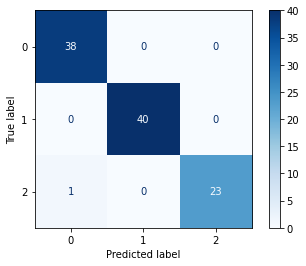

In [15]:
# Matriz de confusão
cm = confusion_matrix(penguins_teste_y, predicoes, labels=[0,1,2])
display_confusion_matrix = ConfusionMatrixDisplay(cm, display_labels=[0,1,2])
display_confusion_matrix.plot(cmap=plt.cm.Blues)
plt.show()

# KNN com KDTree

In [16]:
# Métodos e classes auxiliares

def distancia_euclidiana(data1, data2):
    
    # Para int e float
    if isinstance(data1, int) or isinstance(data1, float):
        return math.sqrt((data1 - data2) ** 2)
    
    # Para arrays
    distancia = 0
    
    for i in range(len(data1)):
        distancia += (data1[i] - data2[i]) ** 2
    distancia = math.sqrt(distancia)
    
    return distancia

class Nodo:
    
    def __init__(self, data):
        self.left = None
        self.right = None
        self.data = data.values[:-1]
        self.classe = int(data.values[-1])
    
    def Print(self):
        print("X: " + str(self.data))
        print("Y: " + str(self.classe))

class kD_tree:
    
    def __init__(self, df=None):
        if df is not None:
            self.kD_tree = self.create_kD_tree(df)
    
    def train(self, df):
        self.kD_tree = self.create_kD_tree(df)
    
    # Os dois métodos abaixo 
    def create_kD_tree(self, df):
        root = self.kD_tree_nodo(df, 0)
        return root
    
    def kD_tree_nodo(self, df, featureNum):

        if len(df) == 0:
            return None
        if len(df) == 1:
            return Nodo(df.iloc[0])

        df.sort_values(by=df.columns.values[featureNum], inplace=True)

        if (len(df) % 2 == 0):
            median_index = (len(df)//2) - 1
        else:
            median_index = len(df)//2

        novoNodo = Nodo(df.iloc[median_index])
        novoNodo.left = self.kD_tree_nodo(df[:median_index], (featureNum + 1) % (len(df.columns) - 1))
        novoNodo.right = self.kD_tree_nodo(df[median_index + 1:], (featureNum + 1) % (len(df.columns) - 1))
        
        return novoNodo
    
    # Algoritmo como o mostrado em aula, adaptado para manter a menor distância já calculada
    def vizinho_mais_proximo(self, n, search_point, c_neighbor, indice_feature, menor_distancia):

        if n is None: 
            return c_neighbor, menor_distancia

        distancia_atual = distancia_euclidiana(n.data, search_point)
        if distancia_atual < menor_distancia:
            menor_distancia = distancia_atual
            c_neighbor = n

        if n.data[indice_feature] > search_point[indice_feature]:
            good_side= n.left
            bad_side = n.right
        else:
            good_side = n.right
            bad_side = n.left

        c_neighbor, menor_distancia = self.vizinho_mais_proximo(good_side, search_point, c_neighbor, 
                                                               (indice_feature + 1) % len(search_point), menor_distancia)

        if self.vale_buscar(c_neighbor, bad_side, indice_feature, menor_distancia):
            c_neighbor, menor_distancia = self.vizinho_mais_proximo(bad_side, search_point, c_neighbor,
                                                                   (indice_feature + 1) % len(search_point), menor_distancia)

        return c_neighbor, menor_distancia
    
    def vale_buscar(self, nodo_mais_proximo, nodo_testado, indice_feature, menor_distancia):
        if nodo_testado is None:
            return False

        distancia_minima = distancia_euclidiana(nodo_testado.data[indice_feature], nodo_mais_proximo.data[indice_feature])

        return distancia_minima <= menor_distancia

    def predicao(self, X, maisInfo = False):
        vizinho, distancia = self.vizinho_mais_proximo(self.kD_tree, X, self.kD_tree, 0, distancia_euclidiana(self.kD_tree.data, X))
        if maisInfo:
            return vizinho.classe, vizinho.data, distancia
        else:
            return vizinho.classe
        

# Treinamento e Inferência KDTree

In [17]:
# Calcula 70% do dataset, para separar em 70/30
data_set_70_por_cento = math.ceil((len(penguins_numeric_and_target)/100)*70)

# Embaralha os dados antes de separá-los 
penguins_embaralhado = penguins_numeric_and_target.sample(frac=1)

# Separa em dados de treino e teste
penguins_treino = penguins_embaralhado.iloc[0:data_set_70_por_cento]
penguins_teste = penguins_embaralhado.iloc[data_set_70_por_cento:]

In [18]:
# Constroi a KDTree com base nos dados de teste
penguins_kD_tree = kD_tree(penguins_treino)

/tmp/ipykernel_23856/2766908779.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=df.columns.values[featureNum], inplace=True)


In [19]:
# Separa os dados de teste entre atributos preditivos e atributo-alvo
penguins_teste_y = penguins_teste["Species-Numeric-Class"]
penguins_teste_x = penguins_teste.drop(columns=["Species-Numeric-Class"])

In [20]:
# Faz as predições com base nos atributos preditivos de teste
predicoes = []
for x_value in penguins_teste_x.to_numpy():
    y = penguins_kD_tree.predicao(np.array(x_value))
    predicoes.append(y)

In [21]:
# Métricas de de acurácia, precisão, recall e f1
print(classification_report(penguins_teste_y, predicoes))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       1.00      0.97      0.99        38
           2       0.89      0.94      0.91        17

    accuracy                           0.96       102
   macro avg       0.95      0.96      0.95       102
weighted avg       0.96      0.96      0.96       102



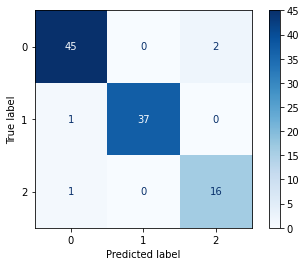

In [22]:
# Matriz de confusão
cm = confusion_matrix(penguins_teste_y, predicoes, labels=[0,1,2])
display_confusion_matrix = ConfusionMatrixDisplay(cm, display_labels=[0,1,2])
display_confusion_matrix.plot(cmap=plt.cm.Blues)
plt.show()